# Machine Learning - Nested cross validataion and k-nearest neighbour

Nested cross validation, k-nearest neighbour and confusion and performance metrics from scratch.

----


In [3]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots

# set the seed for the random number generator
mySeed=12345678

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
#print(iris.DESCR) # print dataset description

## 1. Exploratory Data Analysis

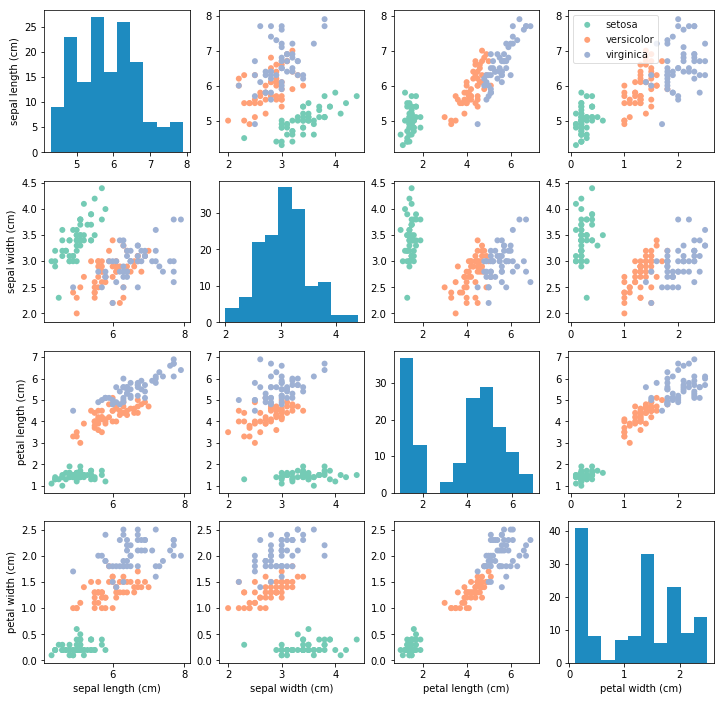

----

In [1]:
"""Create a grid of plots"""
def myplotGrid(X,y):
    # create a figure with multiple subplots
    fig = plt.figure(figsize=(12,12))
    fig.suptitle("Two feature interaction")
    # Your code here...
    for i in range(0, 4):
        for j in range(0, 4):
            if i==j:
                ax = fig.add_subplot(4, 4, i+j*4 +1)
                plt.hist(X[:, i])
            else:
                ax = fig.add_subplot(4, 4, i+j*4 +1)
                plt.scatter(X[:,i], X[:,j], c=y, cmap=plt.cm.Set2)  
                #ax.legend(iris.target_names)

            if j == 3:
                ax.set_xlabel(iris.feature_names[i])
            if i == 0:
                ax.set_ylabel(iris.feature_names[j])
   

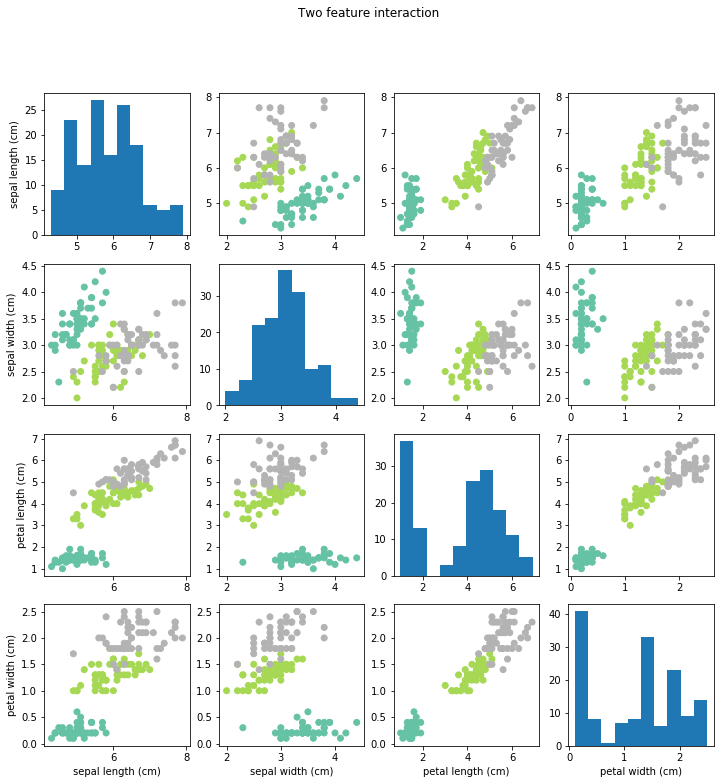

In [4]:
# run the plotting function
myplotGrid(X,y) # visualise data

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)
    
-----


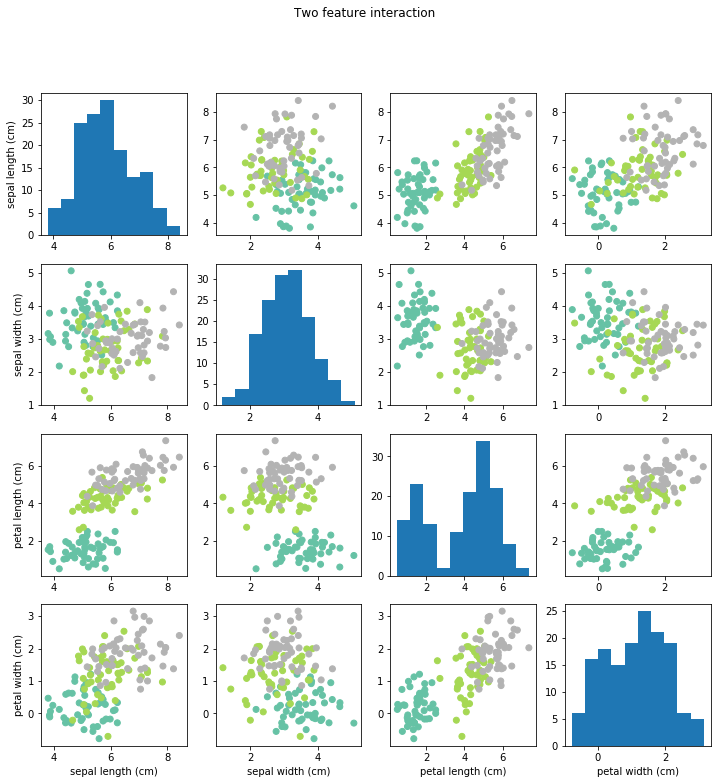

In [5]:
# initialize random seed to replicate results over different runs
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN, y)
#print(XN)

## 2. Implementing kNN

----

In [6]:
import math, random
import numpy as np
from collections import Counter

"""Distance Functions"""
def euclidian_dist(a, b):
    '''Takes two arrays'''
    return np.linalg.norm(a-b, axis=0)

def manhattan_dist(a, b):
    '''Takes two arrays'''
    result = 0
    for i in range(0, len(a)):
        result += math.fabs(a[i] - b[i])
    return result

"""Train test and split"""
def my_train_test_split(X, y, ts):
    '''Takes: X, y, ts=test size: a number between 0 and 1'''
    # test test size value
    if (ts < 0.0 or ts > 1.0):
        print("please use a test size bettween 0 and 1")
        return
    # Shuffle X and y
    l = np.arange(X.shape[0])
    random.shuffle(l)
    X = X[l]
    y = y[l]
    # Split X and y using the test_size number  
    cut_point = int(len(X)*(ts))
    X_test = X[0:cut_point]
    y_test = y[0:cut_point]
    X_train = X[cut_point:]
    y_train = y[cut_point:]
    return (X_train, X_test, y_train, y_test)

"""kNN"""
def mykNN(X_train, y_train, X_test, k, distance_type):
    ''' Takes: X=training_inputs, y=training_outputs, X=test_inputs, 
        k=num_of_neighbours, distance_type=("euclidian" | "manhattan")
    '''
    predicted=[]  
    # Fit and predict
    for x in X_test:
        neighbours=[[],[]]
        # Get distances between all data points either euclidian or manhttan
        if distance_type=="euclidian":
            distances = [euclidian_dist(x, j) for j in X_train]
        elif distance_type=="manhattan":
            distances = [manhattan_dist(x, j) for j in X_train]         
        # Get indices of the k smallest within neighbours
        k_nearest_ids = np.argsort(distances)[:k]
        # Get labels for those indices
        k_nearest_labels = [y_train[m] for m in k_nearest_ids]
        # Count the labels 
        counts = np.bincount(k_nearest_labels)
        # Predicted class is most common class
        predicted.append(np.argmax(counts))
    return np.array(predicted)

# # Split
X_train, X_test, y_train, y_test = my_train_test_split(XN, y, 0.2)
# # Get predicted values
y_ = mykNN(X_train, y_train, X_test, 3, "euclidian")

print("Predicted values: \n")
print(y_)
print("\n")
print("True values: \n")
print(y_test)

Predicted values: 

[1 0 1 0 2 0 2 1 1 0 2 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 2 1 2 2]


True values: 

[1 0 1 0 2 0 2 1 1 0 2 0 1 0 0 2 0 1 2 0 0 1 1 2 2 0 2 1 1 2]


In [9]:
#create a matrix with entries equal to zero, and subsequently build the confusion matrix
#the method should return the confusion matrix in a numpy array
def myConfMat(y_test,y_pred,classno):
    C = [[0, 0, 0], # initialize the confusion matrix to zeros
         [0, 0, 0],
         [0, 0, 0]] 
    
    for i in range(0, len(y_pred)):
        C[y_test[i]][y_pred[i]] +=1
    #loop through all results and update the confusion matrix
    return C

def myPrecision(y_test,y_pred):
    classes = np.unique(y_pred)
    precision = np.zeros(classes.shape)
    # get confusion matrix
    conf_matrix = myConfMat(y_test,y_pred,len(np.unique(y)))
    for i in range(0,3):
        tp_plus_fp=0
        for j in classes:
            # true positives + false positives
            tp_plus_fp+=conf_matrix[j][i]
        # precision = true positives / true positives + false positives
        class_precision=conf_matrix[i][i]/tp_plus_fp
        precision[i]=class_precision
    return precision

def myRecall(y_test,y_pred):
    classes = np.unique(y_pred)
    recall = np.zeros(classes.shape)
    # get confusion matrix
    conf_matrix = myConfMat(y_test,y_pred,len(np.unique(y)))
    for i in range(0,3):
        tp_plus_fn=0
        for j in classes:
            # true positives + false negatives
            tp_plus_fn+=conf_matrix[i][j]
        # recall = true positives / true positives + false negatives
        class_recall=conf_matrix[i][i]/tp_plus_fn
        recall[i]=class_recall
    return recall

#use the numpy function where to return the accuracy given the true/predicted labels.  i.e., #correct/#total
def myAccuracy(y_test,y_pred):
    accuracy = len(y_test[np.where(y_test==y_pred)])/len(y_pred) #np.where()
    return accuracy

print("homemade functions:")
print("accuracy: %s" % myAccuracy(y_test,y_))
print('classes:      %s ' % np.unique(y_) )    
print('my precision: %s' % myPrecision(y_test,y_))
print('my recall:    %s \n\n' % myRecall(y_test,y_))

homemade functions:
accuracy: 0.8333333333333334
classes:      [0 1 2] 
my precision: [1.         0.69230769 0.83333333]
my recall:    [1.         0.9        0.55555556] 




## 3. Nested Cross-validation using your implementation of KNN

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold, and a list of the corresponding parameters
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)

----

In [11]:
def myConfMat(y_test,y_pred,classno):
    C = [[0, 0, 0], # initialize the confusion matrix to zeros
         [0, 0, 0],
         [0, 0, 0]] 
    
    for i in range(0, len(y_pred)):
        C[y_test[i]][y_pred[i]] +=1
    #loop through all results and update the confusion matrix
    return C

def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    np.random.seed(mySeed)
    accuracy_fold=[]
    parameters_fold=[]
    conf_matrices=[]
    #TASK: use the function np.random.permutation to generate a list of shuffled indices from in the range (0,number of data)
    #(you did this already in a task above)
    L=list(range(X.shape[0]))
    indices = np.random.permutation(L)
    #TASK: use the function array_split to split the indices to foldK different bins (here, 5)
    #uncomment line below
    bins=np.array_split(indices, foldK)
    #print(bins)
    #no need to worry about this, just checking that everything is OK
    assert(foldK==len(bins))
    #loop through folds
    for i in range(0,foldK):
        foldTrain=[] # list to save current indices for training
        foldTest=[]  # list to save current indices for testing
        foldVal=[]    # list to save current indices for validation
        #loop through all bins, take bin i for testing, the next bin for validation, and the rest for training
        valBin = (i+1)%foldK
        for j in range(0,len(bins)):
            if (i == j):
                foldTest = bins[i]
            elif (j == valBin):
                foldVal = bins[valBin]
            else:
                foldTrain.extend(bins[j])

        #no need to worry about this, just checking that everything is OK
        #assert not np.intersect1d(foldTest,foldVal)
        #assert not np.intersect1d(foldTrain,foldTest)
        #assert not np.intersect1d(foldTrain,foldVal)
        bestDistance='' #save the best distance metric here
        bestNN=-1 #save the best number of neighbours here
        bestAccuracy=-10 #save the best attained accuracy here (in terms of validation)
        # loop through all parameters (one for loop for distances, one for loop for nn)
        # train the classifier on current number of neighbours/distance
        # obtain results on validation set
        # save parameters if results are the best we had
        for d in dists:
            for nn in nns:
                #split to train and test
                #define knn classifier, with 5 neighbors and use the euclidian distance
                #knn=KNeighborsClassifier(n_neighbors=nn, metric=d)
                #knn.fit(X[foldTrain],y[foldTrain])
                y_pred=mykNN(X[foldTrain],y[foldTrain],X[foldVal],nn,d)
                accuracy = myAccuracy(y[foldVal], y_pred)
                if accuracy > bestAccuracy:
                    bestDistance = d
                    bestNN = nn
                    bestAccuracy = accuracy
        #evaluate on test data:
        #extend your training set by including the validation set
        #train k-NN classifier on new training set and test on test set
        #get performance on fold, save result in accuracy_fold
        foldTrain.extend(foldVal)
        y_=mykNN(X[foldTrain],y[foldTrain], X[foldTest], bestNN,bestDistance)
        accuracy_=myAccuracy(y[foldTest],y_)
        accuracy_fold.append(accuracy)
        parameters_fold.append((bestDistance, bestNN))
        conf_matrix=myConfMat(y[foldTest],y_,len(np.unique(y)))
        conf_matrices.append(conf_matrix)
        #print('==== Final Cross-val on test on this fold with NN', bestNN, 'dist', bestDistance, ' accuracy ',myAccuracy(y[foldTest],y_))

    return accuracy_fold, parameters_fold, np.array(conf_matrices);

In [12]:
#Clean
# Do nested cross validated k nearest neighbour on clean data
dists=["euclidian", "manhattan"]
mySeed=123456
accuracies_fold, best_parameters_fold, conf_matrices = myNestedCrossVal(X,y,5,list(range(1,11)),dists,mySeed)
avg_accuracy = np.average(accuracies_fold)
sd = np.std(accuracies_fold)
import pandas
columns=(["accuracy", "k", "distance"])
rounded_accuracies=["{0:.2f}".format(i) for i in accuracies_fold]
dist_metrics=[best_parameters_fold[i][0] for i in range(0,len(best_parameters_fold))]
nns=[best_parameters_fold[i][1] for i in range(0,len(best_parameters_fold))]
data = np.array([rounded_accuracies,nns,dist_metrics])
df=pandas.DataFrame(data.T,np.arange(1,6), columns,)
print("Clean")
print("\nTotal accuracy: %8.3f ± %8.3f" % (avg_accuracy,  sd))
df

Clean

Total accuracy:    0.967 ±    0.021


,accuracy,k,distance
1,0.97,1,euclidian
2,1.00,6,euclidian
3,0.93,3,euclidian
4,0.97,3,euclidian
5,0.97,3,euclidian


In [13]:
#Noisey
# Do nested cross validated k nearest neighbour on noisey data
noisey_accuracies_fold, noisey_best_parameters_fold, noisey_conf_matrices = myNestedCrossVal(XN,y,5,list(range(1,11)),dists,mySeed)
noisey_avg_accuracy = np.average(noisey_accuracies_fold)
sd = np.std(noisey_accuracies_fold)
# Formatting stuff
import pandas
columns=(["accuracy", "k", "distance"])
noisey_rounded_accuracies=["{0:.2f}".format(i) for i in noisey_accuracies_fold]
noisey_dist_metrics=[noisey_best_parameters_fold[i][0] for i in range(0,len(noisey_best_parameters_fold))]
noisey_nns=[noisey_best_parameters_fold[i][1] for i in range(0,len(noisey_best_parameters_fold))]
noisey_data = np.array([noisey_rounded_accuracies,noisey_nns,noisey_dist_metrics])
noisey_df=pandas.DataFrame(noisey_data.T,np.arange(1,6), columns,)
print("Noisey")
print("\nTotal accuracy: %8.3f ± %8.3f" % (noisey_avg_accuracy,  sd))
noisey_df

Noisey

Total accuracy:    0.880 ±    0.045


,accuracy,k,distance
1,0.93,6,euclidian
2,0.90,7,euclidian
3,0.80,1,euclidian
4,0.90,1,manhattan
5,0.87,7,euclidian


In [14]:
def myPrecision(conf_matrix):
    '''Takes confusion matrix returns precision'''
    classes = np.unique(y)
    precision = np.zeros(classes.shape)
    for i in range(0,len(conf_matrix)):
        tp_plus_fp=0
        for j in classes:
            # true positives + false positives
            tp_plus_fp+=conf_matrix[j][i]
        # precision = true positives / true positives + false positives
        class_precision=conf_matrix[i][i]/tp_plus_fp
        precision[i]=class_precision
    return precision

def myRecall(conf_matrix):
    '''Takes confusion matrix returns recall'''
    classes = np.unique(y)
    recall = np.zeros(classes.shape)
    for i in range(0,len(conf_matrix)):
        tp_plus_fn=0
        for j in classes:
            # true positives + false negatives
            tp_plus_fn+=conf_matrix[i][j]
        # recall = true positives / true positives + false negatives
        class_recall=conf_matrix[i][i]/tp_plus_fn
        recall[i]=class_recall
    return recall

def summary_matrices_print(conf_matrices):
    conf=np.zeros(conf_matrices[0].shape)
    for i in conf_matrices:
        conf=np.add(conf,i)    
    print("Summary confusion matrix of data: \n")
    print(conf,"\n")
    precision = myPrecision(conf)
    print("Class-relative precision for classes (0,1,2): %s" %precision)
    recall = myRecall(conf)
    print("Class-relative recall for classes (0,1,2): %s" %recall)
    

print("Clean data\n")
summary_matrices_print(conf_matrices)
print("Accuracy: %8.2f"%avg_accuracy)
print("\n\nNoisey data\n")
summary_matrices_print(noisey_conf_matrices)
print("Accuracy: %8.2f"%noisey_avg_accuracy)

Clean data

Summary confusion matrix of data: 

[[50.  0.  0.]
 [ 0. 46.  4.]
 [ 0.  2. 48.]] 

Class-relative precision for classes (0,1,2): [1.         0.95833333 0.92307692]
Class-relative recall for classes (0,1,2): [1.   0.92 0.96]
Accuracy:     0.97


Noisey data

Summary confusion matrix of data: 

[[50.  0.  0.]
 [ 1. 40.  9.]
 [ 0. 11. 39.]] 

Class-relative precision for classes (0,1,2): [0.98039216 0.78431373 0.8125    ]
Class-relative recall for classes (0,1,2): [1.   0.8  0.78]
Accuracy:     0.88
